<a href="https://colab.research.google.com/github/arun-arunisto/Tensorflow_Tutorial/blob/todo/Image_Classification_Using_PretrainedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classifciation using pre-trained models

In this tutorial we will learn to perform image classification using pre-trained models

### To use any pre-trained models there are four steps required
1. Load a pre-trained model
2. preprocess the imput images using a dedicated pre-processing function that is accessible in the model, <code>preprocess_input()</code>
3. call the <code>predict()</code> method to generate predictions
4. decode the predictions using a dedicated post-processing function that is accessible in the model <code>decode_predictions()</code>

In [2]:
#importing packages
import tensorflow as tf
import matplotlib.pyplot as plt
import glob as glob
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "TF-Keras-Bootcamp-NB07-assets.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [5]:
#reading sample images
image_paths = sorted(glob.glob("images"+os.sep+"*.png"))
print(image_paths)

['images/baseball-player.png', 'images/clown-fish.png', 'images/elephant.png', 'images/forklift.png', 'images/ice-cream.png', 'images/lemons.png', 'images/magnetic-compass.png', 'images/polar-bear.png']


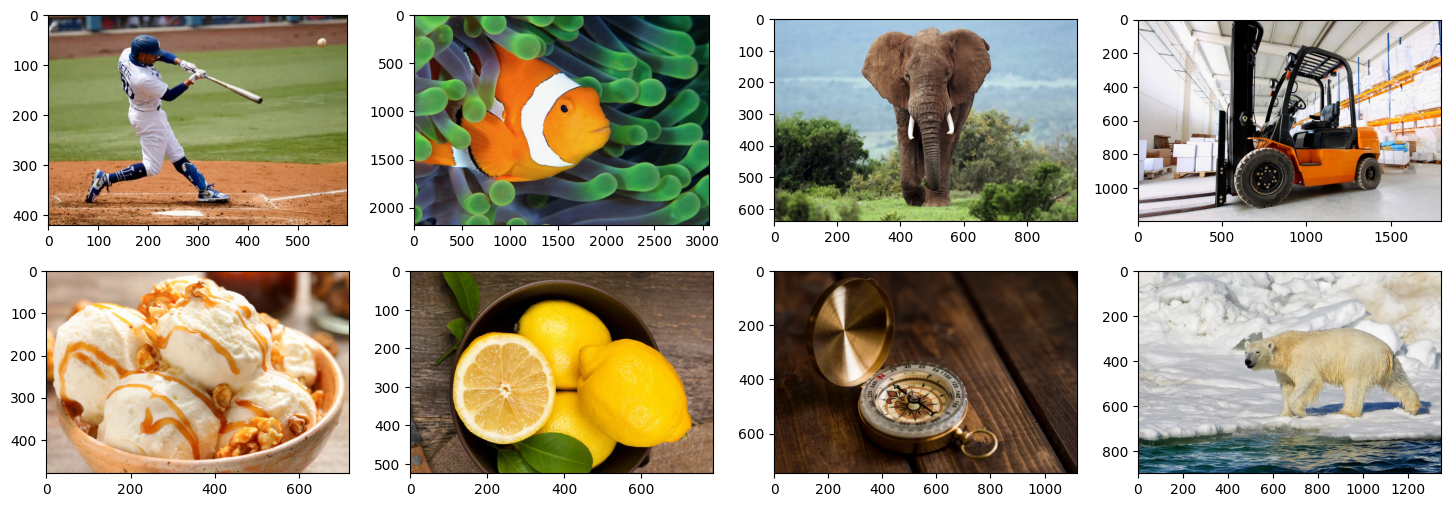

In [6]:
#displaying sample images
plt.figure(figsize=(18, 6))
for idx, image_path in enumerate(image_paths):
  image = plt.imread(image_path)
  plt.subplot(2, 4,idx+1)
  plt.imshow(image)

In [7]:
#Loading the models
model_vgg16 = tf.keras.applications.vgg16.VGG16()
model_resnet50 = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

96112376/96112376 [==============================] - 0s 0us/step


In [8]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


The first unspecified dimension is the batch size, followed by the spatial size and the number of channels

### Creating a function for batch processing

for batch processing we are going to write a function for this, processing steps:
1. read the images
2. perform required pre-processing for the images as required by the model
3. add a batch dimension to the image tensor
4. calling predict() method to make predictions
5. decode the predictions to find the class name and confidence score for the top-k predictions
6. display the result


In [9]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):

    plt.figure(figsize=(20,7))
    for idx, image_path in enumerate(image_paths):

        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)

        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required).
        image_batch = tf.expand_dims(image_resized, axis=0)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions.
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )

        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))

        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

### Make predictions

1/1 [==============================] - 1s 805ms/step


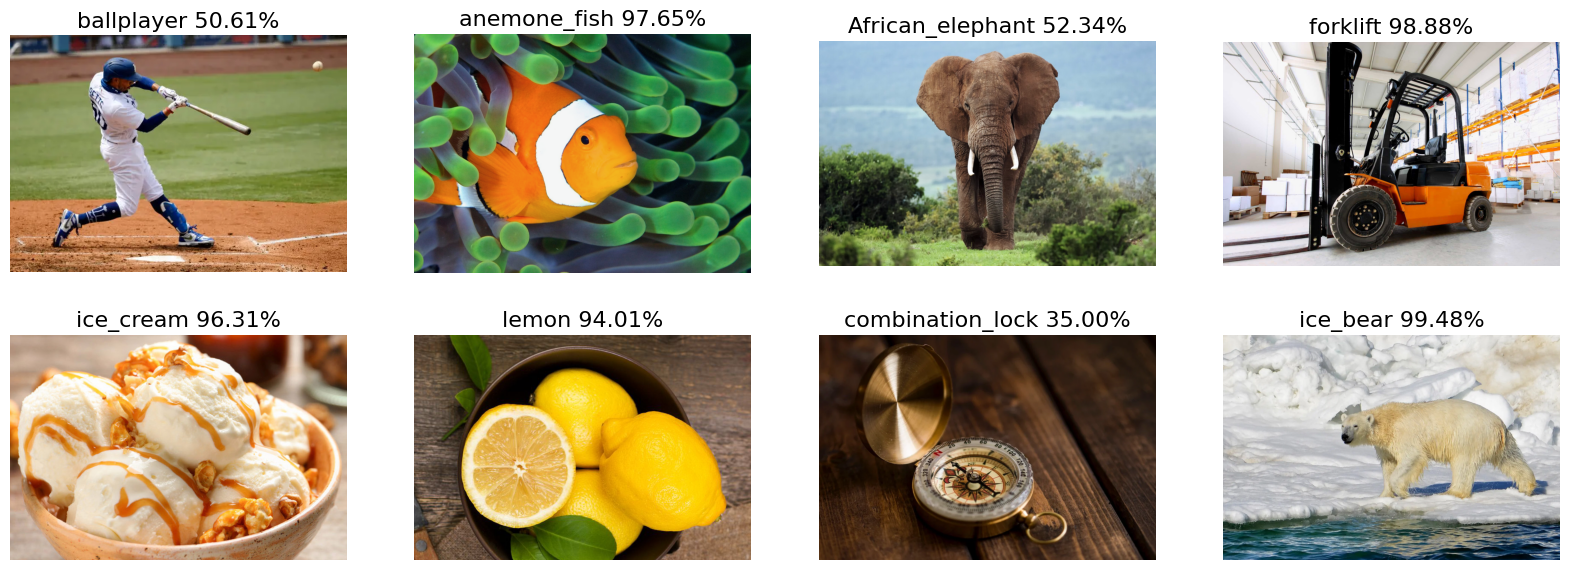

In [12]:
#model vgg 16
model = model_vgg16
size = (224, 224)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
process_images(model, image_paths, size, preprocess_input)

1/1 [==============================] - 0s 194ms/step


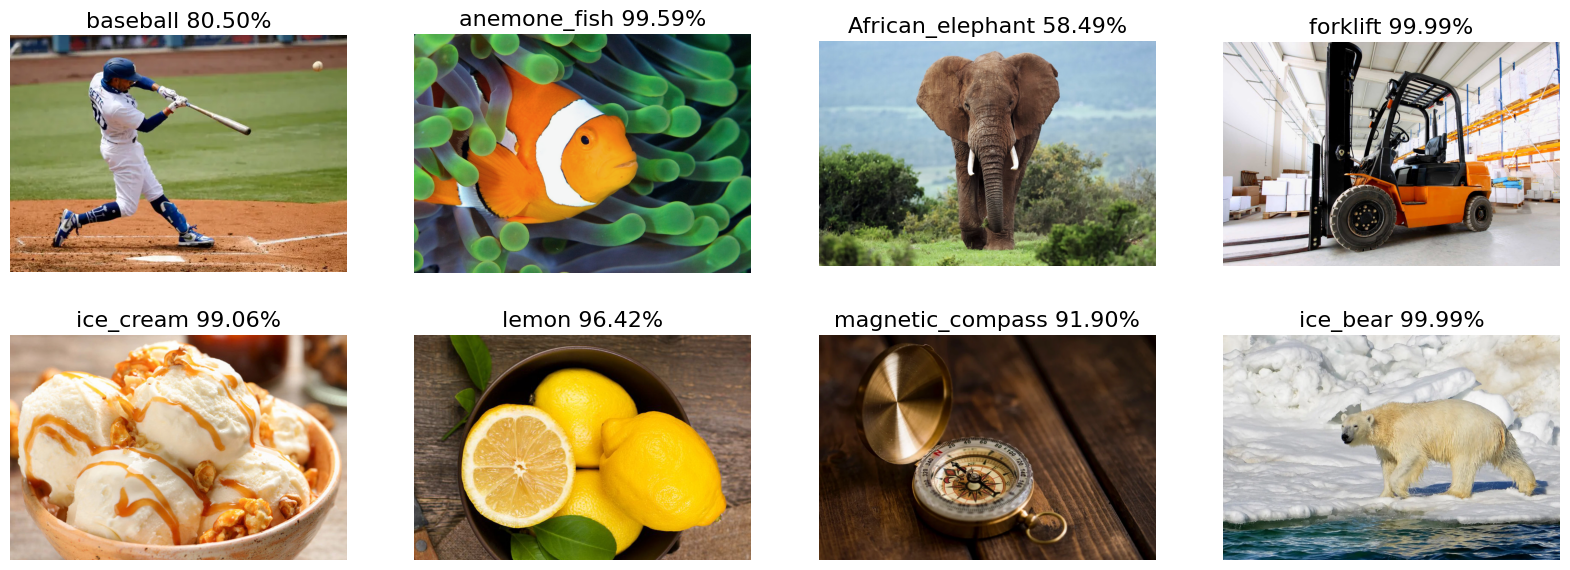

In [14]:
#model Resnet-50
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input)

1/1 [==============================] - 3s 3s/step
Top 1 predicted class:   Pr(Class=ballplayer           [index=   0]) = 69.22
Top 2 predicted class:   Pr(Class=baseball             [index=   1]) = 30.62
1/1 [==============================] - 0s 400ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 92.48
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  2.61
1/1 [==============================] - 0s 429ms/step
Top 1 predicted class:   Pr(Class=African_elephant     [index=   0]) = 89.94
Top 2 predicted class:   Pr(Class=tusker               [index=   1]) =  7.94
1/1 [==============================] - 0s 422ms/step
Top 1 predicted class:   Pr(Class=forklift             [index=   0]) = 98.95
Top 2 predicted class:   Pr(Class=golfcart             [index=   1]) =  0.07
1/1 [==============================] - 0s 403ms/step
Top 1 predicted class:   Pr(Class=ice_cream            [index=   0]) = 99.60
Top 2 predicted class:   Pr(Class=cradle     

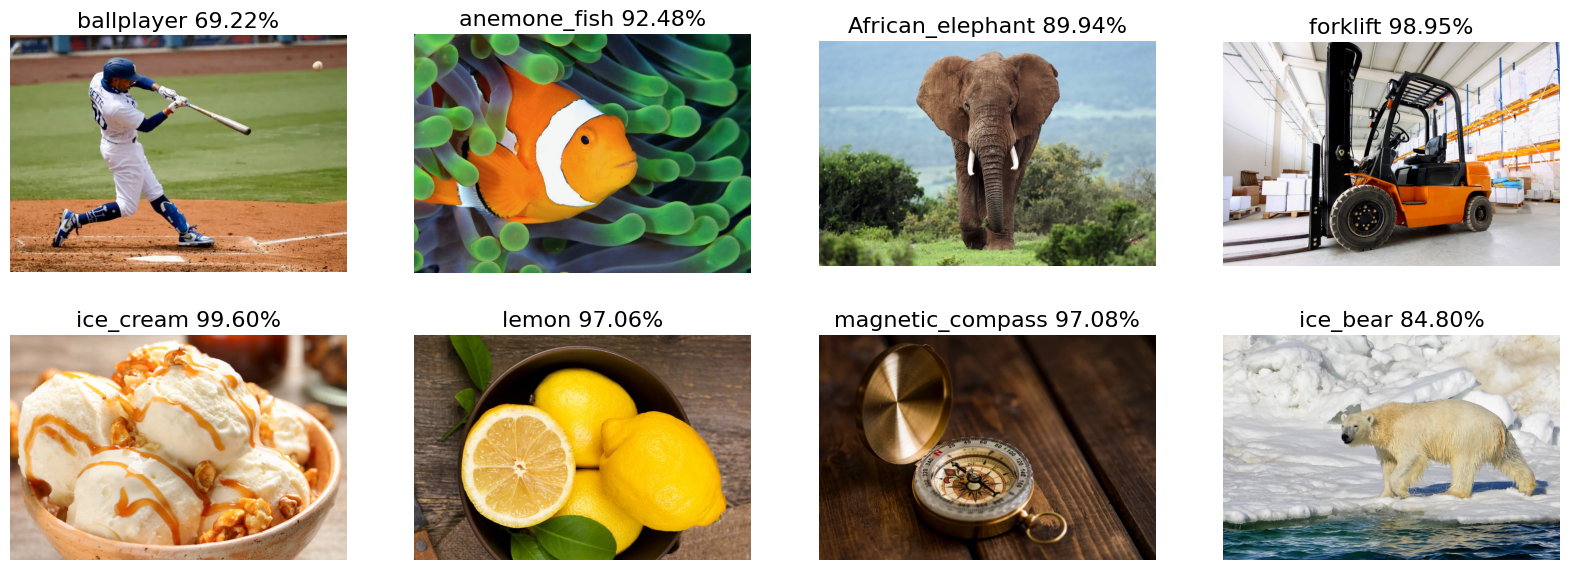

In [15]:
#inception-v3
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True)